In [1]:
from matplotlib import pyplot
from matplotlib import cm
import numpy
%matplotlib inline

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

omega = numpy.zeros((ny,nx))
psi = numpy.zeros_like(omega)

In [5]:
def laplace2d(omega, psi, l1_target, dx, dy):
    
    l2norm = 1
    omegan = numpy.empty_like(omega)
    psin = numpy.empty_like(psi)
    
    while l2norm > l1_target:
        
        omegan = omega.copy()
        psin = psi.copy()
        
        omega[1:-1,1:-1] = 0.25 * (omegan[1:-1,2:] + omegan[1:-1,:-2] +\
                                   omegan[2:,1:-1] + omegan[:-2,1:-1])
        
        psi [1:-1,1:-1] = 1/(2*(dx**2 +dy**2))* \
                          ((psin[1:-1,2:] + psin[1:-1,:-2])*dy**2 +\
                           (psin[2:,1:-1] + psin[:-2,1:-1])*dx**2 +\
                            omegan[1:-1,1:-1]*dx**2*dy**2)
        
        
        #BCs for omega, BCs for psi are automatcially enforced
        omega[-1,1:-1] = -1/(2*dy**2)*(8*psi[-2,1:-1] - psi[-3,1:-1]) - 3/dy        #top
        omega[0,1:-1] = -1/(2*dy**2)*(8*psi[1,1:-1] - psi[2,1:-1])                  #bottom
        omega[1:-1,0] = -1/(2*dy**2)*(8*psi[1:-1,1] - psi[1:-1,2])                  #left
        omega[1:-1,-1] = -1/(2*dy**2)*(8*psi[1:-1,-2] - psi[1:-1,-3])               #right
        
        
        #set break value, both l1 norm value less than 1e-6
        l2norm = L1norm(omega,omegan)
        if l2norm < L1norm(psi,psin):
            l2norm = L1norm(psi,psin)

    
    return omega, psi

In [6]:
A = laplace2d(omega, psi, l1_target, dx, dy)

In [7]:
psi_max = numpy.round(numpy.max(numpy.abs(A[1])),4)
omega_max = numpy.round(numpy.max(numpy.abs(A[0])),4) #why here still returns a long number like 78.1927000000002
print("psi_max = {:.4f}".format(psi_max))
print("omega_max = {:.4f}".format(omega_max))

psi_max = 0.0998
omega_max = 78.1927


In [8]:
numpy.round(psi[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

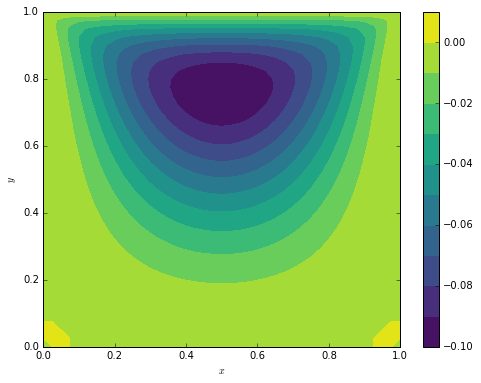

In [9]:
pyplot.figure(figsize=(8,6))
pyplot.contourf(x, y, psi, 10, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();